### 🎵 **Spotify Track Popularity Analysis**

This notebook explores and models Spotify track data to understand the factors influencing song popularity.  
It applies a range of **machine learning techniques** to predict a track’s popularity based on its audio and metadata features.


## ⚙️ Setup and Data Loading

Import all the essential libraries required for **data analysis**, **preprocessing**, and **visualization** to prepare the Spotify dataset for exploration and modeling.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizations

# Upload "dataset.csv" to Google Colab
from google.colab import files

print("Please upload dataset.csv (the Spotify tracks dataset).")
uploaded = files.upload()

: 

## 📂 Load the Dataset

Load the Spotify dataset into a pandas DataFrame for analysis and model development.


In [ ]:
df = pd.read_csv("dataset.csv")
df = df.drop('Unnamed: 0',axis=1)

print("DataFrame loaded. Shape:", df.shape)
df.head()

## 📊 Popularity Distribution Analysis

Visualize the distribution of track popularity to identify any imbalance in the dataset.  
This helps determine whether the model might be biased toward certain popularity ranges.

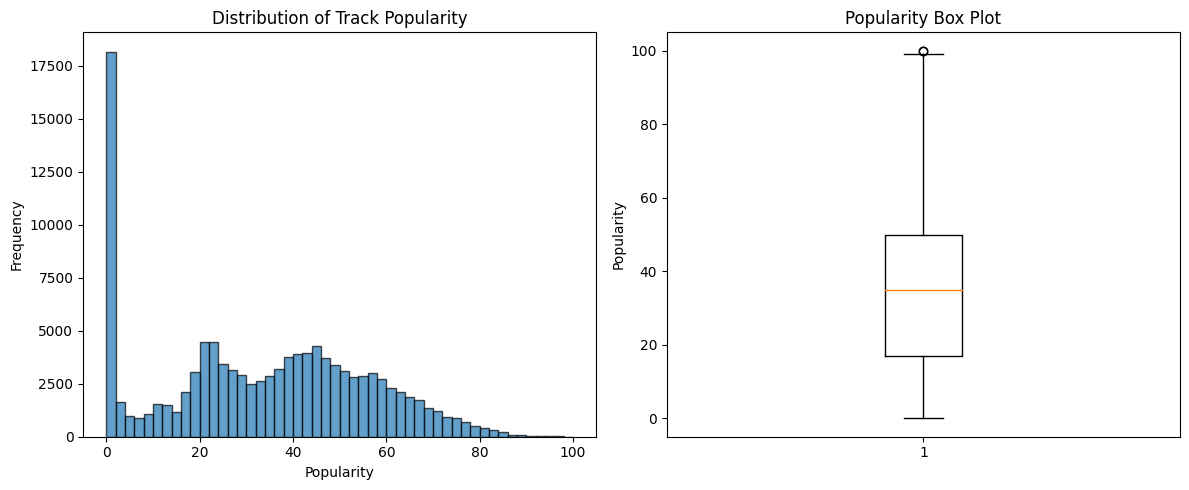

In [3]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

plt.subplot(1, 2, 2)
plt.boxplot(df['popularity'])
plt.ylabel('Popularity')
plt.title('Popularity Box Plot')

plt.tight_layout()
plt.show()



## 🔍 Zooming In: Low Popularity Tracks

Since the dataset appears to have many tracks with very low popularity scores,  
we can zoom in on this range to better visualize and understand the imbalance.


In [4]:
less_frequent = df[df['popularity']<5]
less_frequent.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
25,6D33wCKzWtNEgOovgeVJ7r,Jason Mraz,Mellow Adult Pop,Bella Luna,1,302346,False,0.755,0.454,9,-9.609,0,0.0352,0.7570,0.000000,0.2360,0.330,120.060,4,acoustic
26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic


### 📈 Observation

We can observe that tracks with a **popularity score of 0** have an **extremely high presence** in the dataset.  
This heavy concentration can **skew the model’s learning**, causing it to bias predictions toward low popularity values and reducing its ability to generalize effectively across the full popularity range.


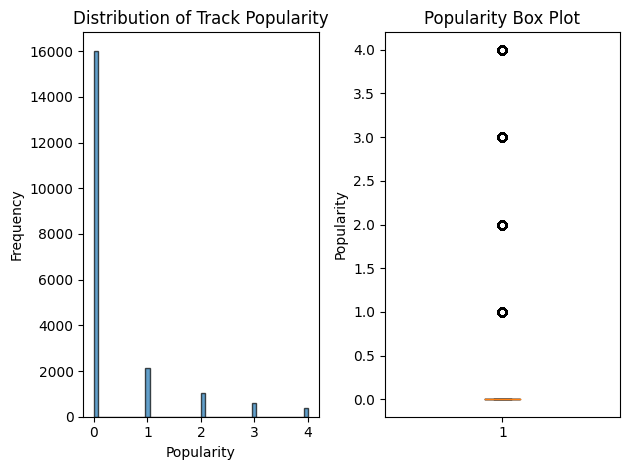

In [5]:

plt.subplot(1, 2, 1)
plt.hist(less_frequent['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

plt.subplot(1, 2, 2)
plt.boxplot(less_frequent['popularity'])
plt.ylabel('Popularity')
plt.title('Popularity Box Plot')

plt.tight_layout()
plt.show()


### Drop Null Values (if any)

Before proceeding with analysis, it's important to handle missing data. We'll drop any rows containing null values to ensure the dataset is clean.

In [6]:
null_columns = df.isnull().sum()
null_columns
df.dropna()
print(df.isnull().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


### Balancing the DataFrame

Imbalanced data can negatively affect model performance. To address this, we can balance the dataset using techniques such as **undersampling**, **oversampling**, or **SMOTE** depending on the task.
In this case we have used **undersampling** to reduce the instances of zero frequency popularity.

In [7]:
import pandas as pd

# Suppose df is your DataFrame
low_pop = df[df['popularity'] == 0]
non_low_pop = df[df['popularity'] > 0]

# Randomly keep, say, 20% of low popularity rows
low_pop_sampled = low_pop.sample(frac=0.03, random_state=42)

# Combine back
balanced_df = pd.concat([low_pop_sampled, non_low_pop])


### Viewing Popularity Distribution

Understanding the distribution of the target variable (`popularity`) helps identify imbalances and skewness that may affect model performance.  

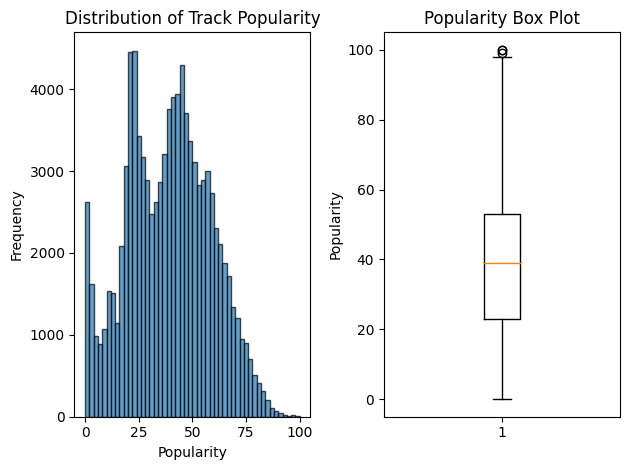

In [8]:
plt.subplot(1, 2, 1)
plt.hist(balanced_df['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

plt.subplot(1, 2, 2)
plt.boxplot(balanced_df['popularity'])
plt.ylabel('Popularity')
plt.title('Popularity Box Plot')

plt.tight_layout()
plt.show()


### Using the Balanced DataFrame

After balancing the dataset, we can proceed with feature selection, model training, and evaluation using the balanced DataFrame to reduce bias towards the majority class.

In [9]:
df = balanced_df.copy()
df = df.dropna(subset=['album_name', 'track_name'])

In [10]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39436,54xQt2K0xZTbgdx9zNUPXp,Sarah Connor,Christmas 2022,The Best Side Of Life,0,229333,False,0.631,0.63400,2,-5.202,1,0.0326,0.56800,0.000,0.124,0.5690,90.947,4,german
39248,3ETUBLVvEzgm07QoU4PioV,George Frideric Handel;The Cambridge Buskers,Clásica para los niños de hoy,Solomon HWV 67 - Arr. The Cambridge Buskers: A...,0,128960,False,0.677,0.17600,0,-18.382,1,0.0674,0.92400,0.681,0.138,0.8620,114.040,4,german
2043,7GEQkaJPZmph6xtzXFNWxn,The Killers,Alternative Christmas 2022,Joy Ride - Night Version,0,436413,False,0.666,0.93500,0,-4.563,1,0.0445,0.00285,0.781,0.352,0.6900,118.999,4,alt-rock
39240,4IcB2mInTQ5jFCbcsREc8q,George Frideric Handel;London Early Opera;Brid...,Celebrating Lord Nelson,"Saul, HWV 53: Dead March",0,186213,False,0.183,0.00699,11,-30.087,1,0.0390,0.95200,0.965,0.124,0.0728,134.455,3,german
8023,72E3wMPI5tVY7VoEWLSuhf,Ella Fitzgerald,CHRISTMAS TOP HITS 2022,Frosty The Snowman,0,131733,False,0.579,0.50200,8,-7.570,1,0.0513,0.73300,0.000,0.281,0.8360,76.783,4,blues


### Deriving Features from Existing Features

In [11]:
df['album_name_len_of_characters'] = df['album_name'].apply(lambda x:len(x))
df['track_name_len_of_characters'] = df['track_name'].apply(lambda x:len(x))

### Label Encode String values (Artist Names and Track Genres)

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Create label encoder
le = LabelEncoder()

# Apply label encoding on each categorical column
df['artists_encoded'] = le.fit_transform(df['artists'])
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,album_name_len_of_characters,track_name_len_of_characters,artists_encoded,track_genre_encoded
39436,54xQt2K0xZTbgdx9zNUPXp,Sarah Connor,Christmas 2022,The Best Side Of Life,0,229333,False,0.631,0.63400,2,...,0.000,0.124,0.5690,90.947,4,german,14,21,23159,39
39248,3ETUBLVvEzgm07QoU4PioV,George Frideric Handel;The Cambridge Buskers,Clásica para los niños de hoy,Solomon HWV 67 - Arr. The Cambridge Buskers: A...,0,128960,False,0.677,0.17600,0,...,0.681,0.138,0.8620,114.040,4,german,29,74,9899,39
2043,7GEQkaJPZmph6xtzXFNWxn,The Killers,Alternative Christmas 2022,Joy Ride - Night Version,0,436413,False,0.666,0.93500,0,...,0.781,0.352,0.6900,118.999,4,alt-rock,26,24,26048,2
39240,4IcB2mInTQ5jFCbcsREc8q,George Frideric Handel;London Early Opera;Brid...,Celebrating Lord Nelson,"Saul, HWV 53: Dead March",0,186213,False,0.183,0.00699,11,...,0.965,0.124,0.0728,134.455,3,german,23,24,9898,39
8023,72E3wMPI5tVY7VoEWLSuhf,Ella Fitzgerald,CHRISTMAS TOP HITS 2022,Frosty The Snowman,0,131733,False,0.579,0.50200,8,...,0.000,0.281,0.8360,76.783,4,blues,23,18,8181,8


### Popularity Correlation with other features

popularity                      1.000000
loudness                        0.070310
danceability                    0.060578
track_genre_encoded             0.055410
time_signature                  0.032461
artists_encoded                 0.005676
key                            -0.003145
mode                           -0.006521
acousticness                   -0.009080
valence                        -0.014735
tempo                          -0.016867
energy                         -0.032753
liveness                       -0.050124
track_name_len_of_characters   -0.050150
duration_ms                    -0.050623
album_name_len_of_characters   -0.068146
speechiness                    -0.088531
instrumentalness               -0.177667
Name: popularity, dtype: float64


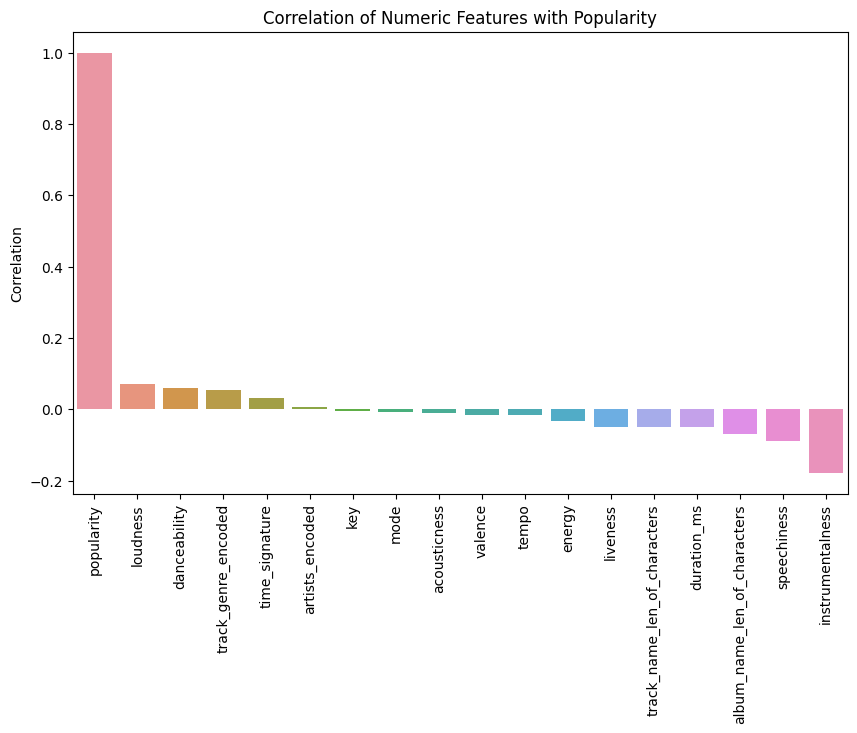

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with popularity
corr = numeric_df.corr()['popularity'].sort_values(ascending=False)

print(corr)

# Plot correlation with popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title("Correlation of Numeric Features with Popularity")
plt.ylabel("Correlation")
plt.show()


### Viewing the popularity distribution again

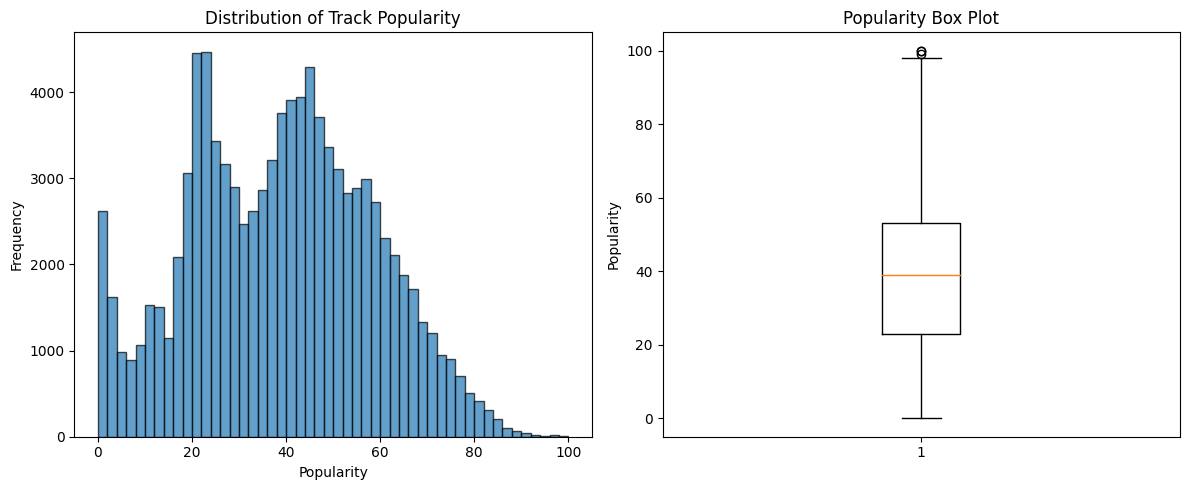

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')

plt.subplot(1, 2, 2)
plt.boxplot(df['popularity'])
plt.ylabel('Popularity')
plt.title('Popularity Box Plot')

plt.tight_layout()
plt.show()



### Distribution of Features

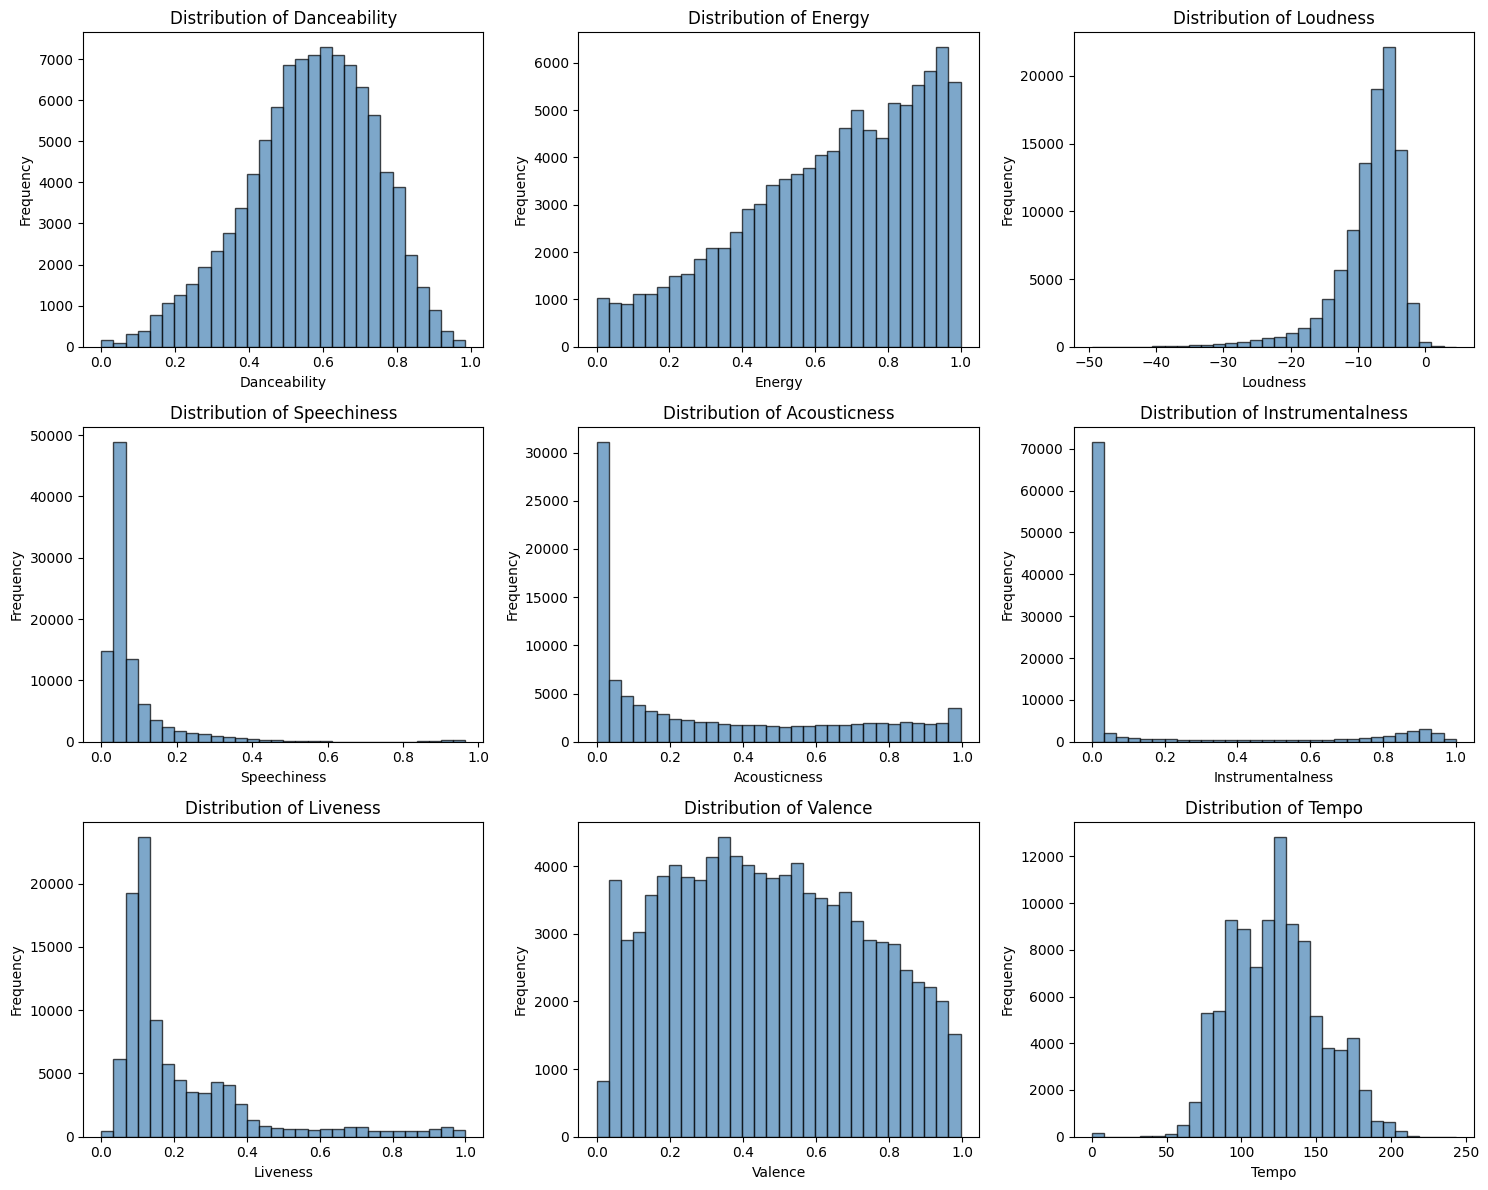

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for idx, feature in enumerate(audio_features):
    row = idx // 3
    col = idx % 3
    axes[row, col].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Distribution of {feature.capitalize()}')

plt.tight_layout()
plt.show()

### Visualizing Correlation Matrix of Features

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


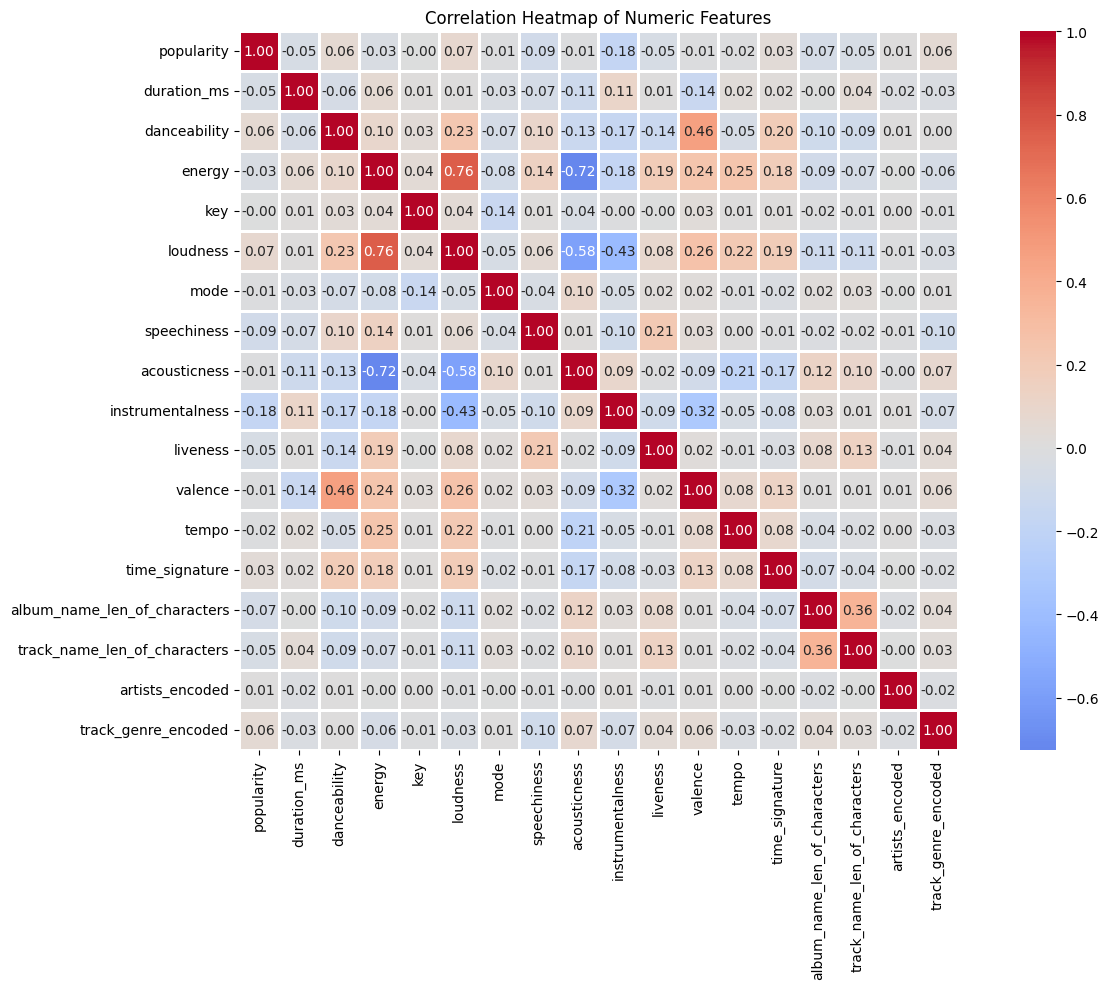

In [16]:
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### Scatter Plot of song's Audio Features

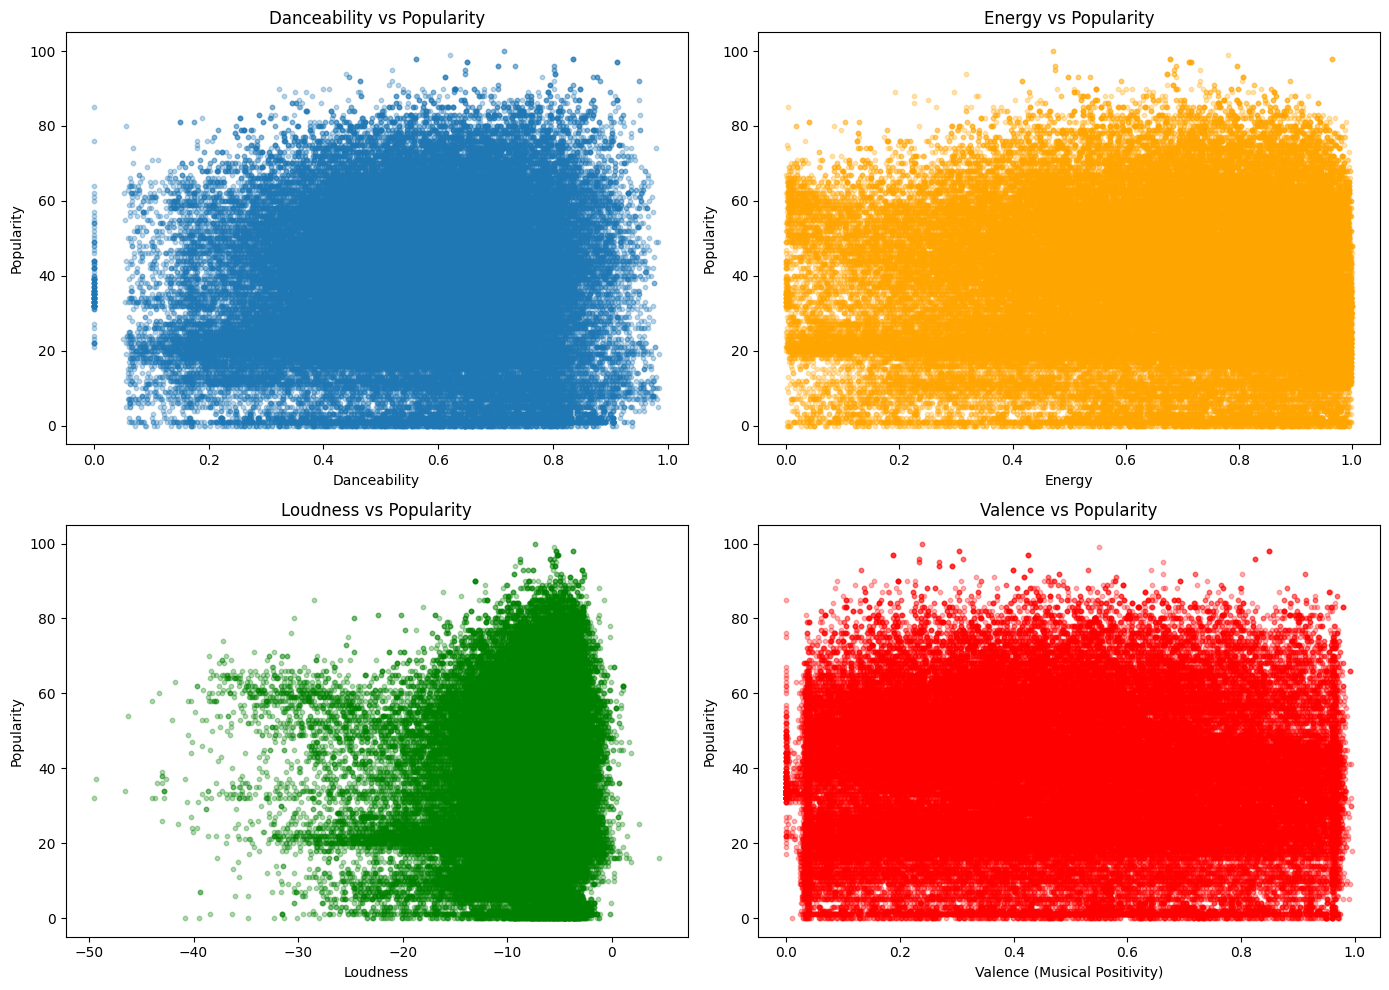

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Danceability vs Popularity
axes[0, 0].scatter(df['danceability'], df['popularity'], alpha=0.3, s=10)
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Popularity')
axes[0, 0].set_title('Danceability vs Popularity')

# Energy vs Popularity
axes[0, 1].scatter(df['energy'], df['popularity'], alpha=0.3, s=10, color='orange')
axes[0, 1].set_xlabel('Energy')
axes[0, 1].set_ylabel('Popularity')
axes[0, 1].set_title('Energy vs Popularity')

# Loudness vs Popularity
axes[1, 0].scatter(df['loudness'], df['popularity'], alpha=0.3, s=10, color='green')
axes[1, 0].set_xlabel('Loudness')
axes[1, 0].set_ylabel('Popularity')
axes[1, 0].set_title('Loudness vs Popularity')

# Valence vs Popularity
axes[1, 1].scatter(df['valence'], df['popularity'], alpha=0.3, s=10, color='red')
axes[1, 1].set_xlabel('Valence (Musical Positivity)')
axes[1, 1].set_ylabel('Popularity')
axes[1, 1].set_title('Valence vs Popularity')

plt.tight_layout()
plt.show()

### Linear Regression

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---- 1. Select features and target ----
# Use only numeric columns (important for linear regression)
numeric_df = df.select_dtypes(include=['number'])

X = numeric_df.drop('popularity', axis=1)
y = numeric_df['popularity']                # target

# ---- 2. Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---- 3. Train Model ----
model = LinearRegression()
model.fit(X_train, y_train)

# ---- 4. Predictions ----
y_pred = model.predict(X_test)

# ---- 5. Evaluation ----
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("------------------")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation:
------------------
Mean Squared Error (MSE): 348.8201
Root Mean Squared Error (RMSE): 18.6767
Mean Absolute Error (MAE): 15.2258
R² Score: 0.0660


### Polynomial Regression

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---- 1. Select numeric features and target ----
numeric_df = df.select_dtypes(include=['number'])

X = numeric_df.drop('popularity', axis=1)   # independent variables
y = numeric_df['popularity']                # target

# ---- 2. Split data ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- 3. Create polynomial features ----
poly = PolynomialFeatures(degree=3, include_bias=False)  # degree=2 means quadratic
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# ---- 4. Train Polynomial Regression (Linear Regression on transformed features) ----
model = LinearRegression()
model.fit(X_train_poly, y_train)

# ---- 5. Predict ----
y_pred = model.predict(X_test_poly)

# ---- 6. Evaluation ----
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Polynomial Regression Evaluation:")
print("--------------------------------")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Polynomial Regression Evaluation:
--------------------------------
Mean Squared Error (MSE): 327.7016
Root Mean Squared Error (RMSE): 18.1025
Mean Absolute Error (MAE): 14.5217
R² Score: 0.1290


### Random Forest Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---- 1. Select numeric features and target ----
numeric_df = df.select_dtypes(include=['number'])

X = numeric_df.drop('popularity', axis=1)
y = numeric_df['popularity']                # target

# ---- 2. Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- 3. Train Random Forest ----
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ---- 4. Predictions ----
y_pred = rf.predict(X_test)

# ---- 5. Evaluation ----
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Evaluation:")
print("------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Random Forest Regression Evaluation:
------------------------------------
Mean Squared Error (MSE): 164.9211
Root Mean Squared Error (RMSE): 12.8422
Mean Absolute Error (MAE): 9.5091
R² Score: 0.5616


### XGBoost Regression

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---- 1. Select numeric features and target ----
numeric_df = df.select_dtypes(include=['number'])
X = numeric_df.drop('popularity', axis=1)
y = numeric_df['popularity']

# ---- 2. Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- 3. Hyperparameter Tuning ----
xgb = XGBRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 250, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 6, 8],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,            # number of parameter settings sampled
    scoring='r2',         # can use 'neg_mean_squared_error' as well
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best estimator after hyperparameter tuning
best_xgb = random_search.best_estimator_

# ---- 4. Predict ----
y_pred_xgb = best_xgb.predict(X_test)

# ---- 5. Evaluate ----
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Evaluation (After Hyperparameter Tuning):")
print("--------------------------------")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost Regression Evaluation (After Hyperparameter Tuning):
--------------------------------
RMSE: 12.10, MAE: 8.75, R²: 0.6111
Best Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 700, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
